# UNIVARIATE ANALYSIS

## NUMERIC COLUMNS

In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

date_cols = [
    'reservation_created_at',
    'trip_month',
    'trip_week',
    'trip_day',
    'trip_period',
    'client_first_reservation',
    'client_prev_reservation',
    'client_next_reservation',
    'client_last_reservation',
    'client_first_trip',
    'client_prev_trip',
    'client_next_trip',
    'client_last_trip'
]

col_types = {'reservation_id':'int'}


original_df = pd.read_csv('data.csv', parse_dates=date_cols)
df = original_df.copy()

In [8]:
df.describe()

,reservation_id,cost,seats,client_id,res_trip_id,stop_id,pickup_stop_id,trip_id,trip_seat_inventory,van_id,seat_price,km_google,trip_cpt,days_between_purchases,client_trip_number,days_between_trips,res_to_trip_days
count,3.533000e+03,3533.000000,3533.000000,3533.000000,3533.000000,3533.000000,3533.000000,3903.000000,3903.000000,3903.000000,3903.000000,3903.000000,3903.000000,2453.000000,3903.000000,2822.000000,3533.000000
mean,2.681275e+06,235.510048,1.234645,358323.476649,503499.451741,16871.231248,16866.855364,503604.144248,19.387907,603.102229,201.648219,215.709270,1251.336112,12.890244,120.956188,11.177681,0.793394
std,5.881861e+03,128.931335,0.423837,87740.242255,7449.348540,855.756893,856.086474,7373.295686,1.482748,241.658459,95.862568,72.335907,412.984591,20.420739,359.377102,19.548527,1.000153
min,2.670159e+06,11.000000,1.000000,-1.000000,490438.000000,13275.000000,13271.000000,490438.000000,10.000000,99.000000,11.000000,7.920000,768.000000,0.000363,1.000000,0.000000,-0.047726
25%,2.675702e+06,180.000000,1.000000,363292.000000,496591.000000,16106.000000,16102.000000,496625.000000,20.000000,406.000000,170.000000,230.760000,1137.037500,1.993776,1.000000,1.066840,0.105299
50%,2.681300e+06,200.000000,1.000000,386569.000000,504052.000000,17132.000000,17128.000000,504063.000000,20.000000,512.000000,185.000000,230.760000,1264.200000,4.963984,3.000000,3.850694,0.442262
75%,2.686700e+06,260.000000,1.000000,404369.000000,510210.000000,17745.000000,17741.000000,510181.000000,20.000000,829.000000,200.000000,231.190000,1275.000000,14.844218,9.000000,12.414063,0.937037
max,2.691862e+06,1200.000000,2.000000,418576.000000,517530.000000,18062.000000,18058.000000,518140.000000,20.000000,991.000000,600.000000,457.610000,3250.000000,224.552297,1411.000000,222.986111,5.557421


### cost

<AxesSubplot:xlabel='cost', ylabel='Count'>

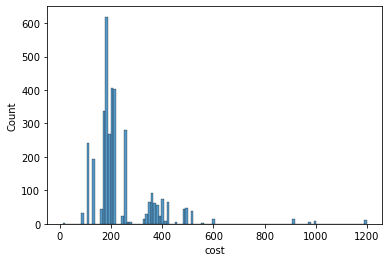

In [38]:
sns.histplot(data=df, x='cost')

<AxesSubplot:xlabel='cost', ylabel='Count'>

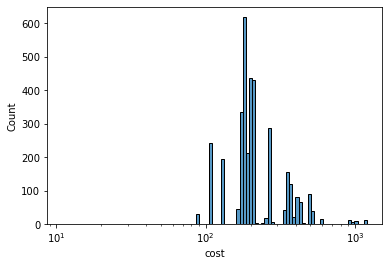

In [10]:
sns.histplot(data=df, x='cost', log_scale=True) # the typicall ride costs $200

### seats

In [93]:
df.seats.value_counts()

1.0    2696
2.0     828
Name: seats, dtype: int64

### trip_seat_inventory

<AxesSubplot:xlabel='trip_seat_inventory', ylabel='Count'>

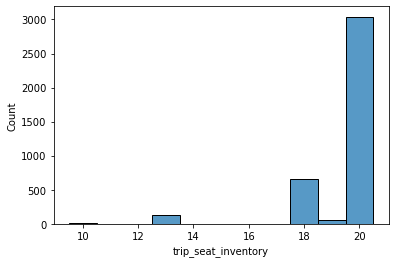

In [11]:
sns.histplot(data=df, x='trip_seat_inventory', discrete=True)

### SEAT PRICE

<AxesSubplot:xlabel='seat_price', ylabel='Count'>

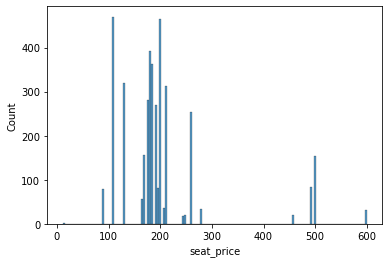

In [12]:
sns.histplot(data=df, x='seat_price')

<AxesSubplot:xlabel='seat_price', ylabel='Count'>

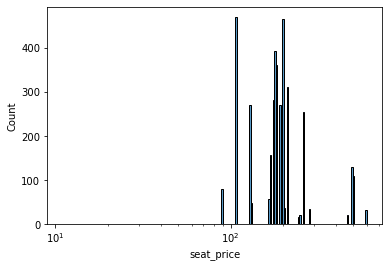

In [13]:
sns.histplot(data=df, x='seat_price', log_scale=True)

# Similar behaviour to 'cost': the typicall seat price is $200.
# What is the relationship between 'cost' and 'seat_price'?

### km_google

In [14]:
df.km_google.value_counts()

230.76    1408
231.19    1283
120.47     416
120.25     375
397.73      94
411.22      85
100.35      40
108.02      40
7.92        35
427.03      30
217.29      26
216.88      25
457.45      19
457.61      13
388.79       7
425.77       7
Name: km_google, dtype: int64

<AxesSubplot:xlabel='km_google', ylabel='Count'>

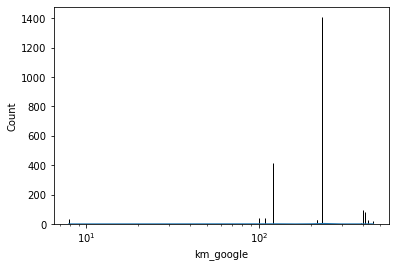

In [16]:
sns.histplot(data=df, x='km_google', log_scale=True, kde=True)

### trip_cpt

<AxesSubplot:xlabel='trip_cpt', ylabel='Count'>

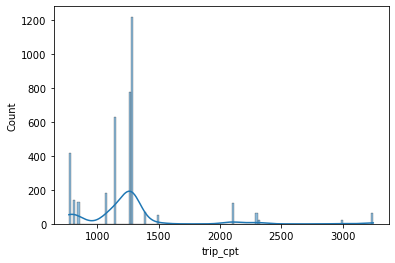

In [17]:
sns.histplot(data=df, x='trip_cpt', kde=True)  # what does CPT stands for, Carriage Paid To?

<AxesSubplot:xlabel='trip_cpt', ylabel='Count'>

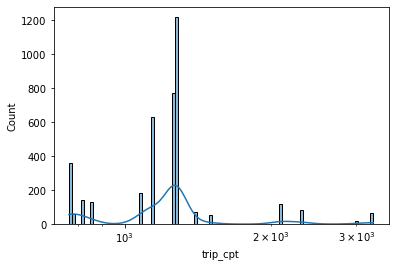

In [18]:
sns.histplot(data=df, x='trip_cpt', log_scale=True, kde=True)

### days_between_purchases

<AxesSubplot:xlabel='days_between_purchases', ylabel='Count'>

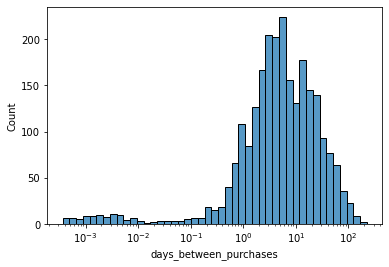

In [19]:
sns.histplot(data=df, x='days_between_purchases', log_scale=True) # the typicall user buys within 10 days

### client_trip_number

In [98]:
df.client_trip_number.describe()

count    3524.000000
mean        5.176504
std         6.428016
min         1.000000
25%         1.000000
50%         3.000000
75%         6.000000
max        45.000000
Name: client_trip_number, dtype: float64

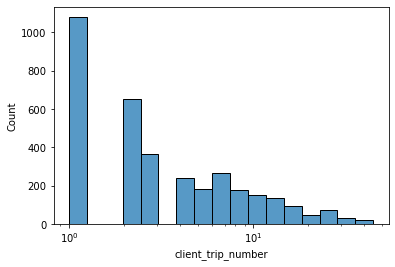

In [100]:
fig = sns.histplot(data=df, x='client_trip_number', log_scale=True)

fig = fig.get_figure()
fig.savefig('img/client_trip.png') 

### days_between_trips

<AxesSubplot:xlabel='days_between_trips', ylabel='Count'>

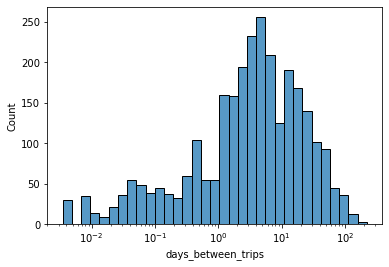

In [21]:
sns.histplot(data=df[df.days_between_trips > 0], x='days_between_trips', log_scale=True) # very similar behaviour to days_between_purchases

### res_to_trip_days

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


<AxesSubplot:xlabel='res_to_trip_days', ylabel='Count'>

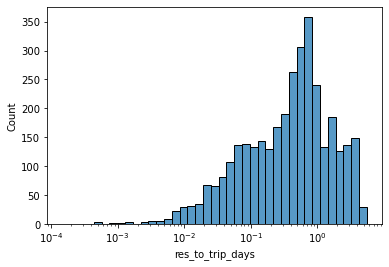

In [22]:
sns.histplot(data=df, x='res_to_trip_days', log_scale=True) # I don't understand this metric